In [1]:
import pandas as pd 
import seaborn as sns 
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
visa_df=pd.read_csv(r"visadataset.csv")
visa_df

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.7900,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.8500,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,Certified


In [3]:
types=dict(visa_df.dtypes)

In [4]:
types

{'case_id': dtype('O'),
 'continent': dtype('O'),
 'education_of_employee': dtype('O'),
 'has_job_experience': dtype('O'),
 'requires_job_training': dtype('O'),
 'no_of_employees': dtype('int64'),
 'yr_of_estab': dtype('int64'),
 'region_of_employment': dtype('O'),
 'prevailing_wage': dtype('float64'),
 'unit_of_wage': dtype('O'),
 'full_time_position': dtype('O'),
 'case_status': dtype('O')}

In [5]:
cat_columns=[keys for keys,values in types.items() if values=='object']
num_columns=[keys for keys,values in types.items() if values!='object']


In [6]:
cat_columns=visa_df.select_dtypes(include='object').columns
num_columns=visa_df.select_dtypes(exclude='object').columns

In [7]:
cat_columns

Index(['case_id', 'continent', 'education_of_employee', 'has_job_experience',
       'requires_job_training', 'region_of_employment', 'unit_of_wage',
       'full_time_position', 'case_status'],
      dtype='object')

In [8]:
num_columns

Index(['no_of_employees', 'yr_of_estab', 'prevailing_wage'], dtype='object')

**Bi variate analysis**

- we already seen uni variate analysis 
- we performed the categorical column analysis
    - frequency table(value counts)
    - bar chart
    - relative frequency table (value counts normalized form)
    - pie chart
- we performed the numerical column analysis
    - Histogram
    - distribution plots 
    - box plot
    - outlier analysis
    - filling the outliers 
- now we will do categorical- categorical analysis
- numerical- numerical analysis
- categorical- numerical analysis

**categorical - categorical**
- lets consider two columns
    - continent
    - case status

In [10]:
visa_df['continent'].value_counts()

Asia             16861
Europe            3732
North America     3292
South America      852
Africa             551
Oceania            192
Name: continent, dtype: int64

In [13]:
visa_df['case_status'].value_counts()

Certified    17018
Denied        8462
Name: case_status, dtype: int64

**task**
- find the certified observation continent wise 
- find the denied observation continent wise 

In [ ]:
#step-1: make the first condition continet=='asia'
#step-2: make the second condition case_status=='certified'
#step-3:make the third condition con1&con2 
#step-4:then retrive the dataframe and take the count 

In [17]:
con1=visa_df['continent']=='Asia'
con2=visa_df['case_status']=='Certified'
con3=con1 & con2
len(visa_df[con3])

11012

In [19]:
visa_df['continent'].unique()

array(['Asia', 'Africa', 'North America', 'Europe', 'South America',
       'Oceania'], dtype=object)

In [25]:
keys=visa_df['continent'].value_counts().keys()

In [36]:
list1=[]
for i in keys:
    con1=visa_df['continent']==i
    con2=visa_df['case_status']=='Certified'
    con3=con1 & con2
    list1.append(len(visa_df[con3]))
list1

[11012, 2957, 2037, 493, 397, 122]

In [53]:
list2=[]
for i in keys:
    con1=visa_df['continent']==i
    con2=visa_df['case_status']=='Denied'
    con3=con1 & con2
    list2.append(len(visa_df[con3]))
list2

[5849, 775, 1255, 359, 154, 70]

In [40]:
df1=pd.DataFrame(zip(keys,list1),columns=['continent','case_status'])
df1

,continent,case_status
0,Asia,11012
1,Europe,2957
2,North America,2037
3,South America,493
4,Africa,397
5,Oceania,122


In [41]:
df2=pd.DataFrame(zip(keys,list2),columns=['continent','case_status'])
df2

,continent,case_status
0,Asia,5849
1,Europe,775
2,North America,1255
3,South America,359
4,Africa,154
5,Oceania,70


In [42]:
df3=pd.DataFrame(zip(keys,list1,list2),columns=['continent','Certified','Denied'])
df3

,continent,Certified,Denied
0,Asia,11012,5849
1,Europe,2957,775
2,North America,2037,1255
3,South America,493,359
4,Africa,397,154
5,Oceania,122,70


In [50]:
#df
#keys
#list1
#list2

In [51]:
df4=pd.DataFrame(zip(list1,list2),index=keys,columns=['Certified','Denied'])
df4

,Certified,Denied
Asia,11012,5849
Europe,2957,775
North America,2037,1255
South America,493,359
Africa,397,154
Oceania,122,70


**cross tab**
- the above data frame we can make by using a method : **cross tab**
- it si available in pandas 
- it takes 
    - index
    - columns
- in above dataframe index column is : **continent**
- in above dataframe data column is :**case_status**

In [58]:
idx_column=visa_df['continent']
data_column=visa_df['case_status']
df5=pd.crosstab(idx_column, data_column)
df5

case_status,Certified,Denied
continent,,
Africa,397,154
Asia,11012,5849
Europe,2957,775
North America,2037,1255
Oceania,122,70
South America,493,359


<Axes: xlabel='continent'>

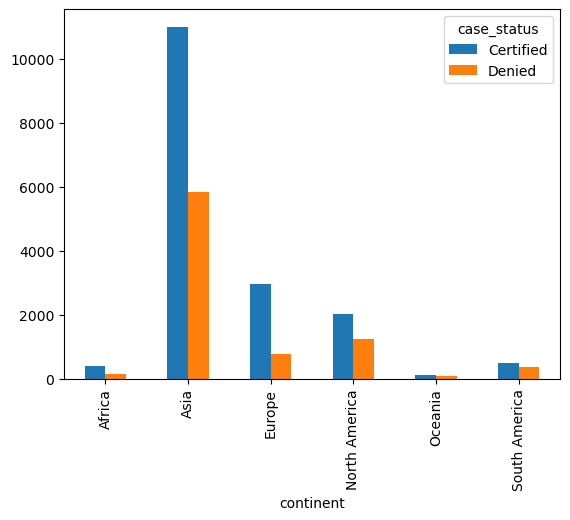

In [59]:
df5.plot(kind='bar')

<Axes: >

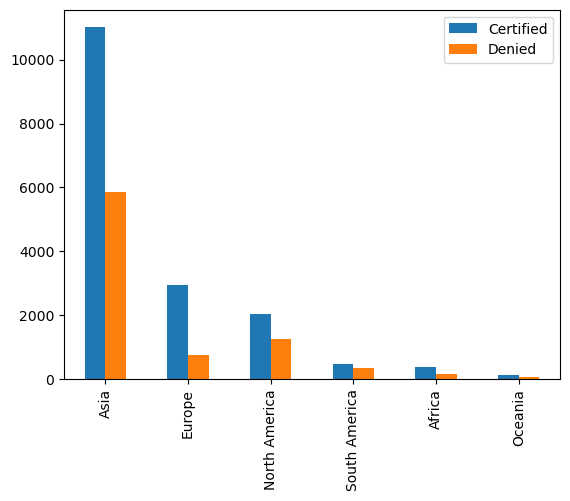

In [60]:
df4.plot(kind='bar')

**multivatiate analysis**

- education 
- continent
- case_status
- we already know from asia there 11k accepted visa
- in that i want furthur break down based on education 
- here also pd.cross tab
    - first fix your index of any one column out of three column
    - then keep two column in a list and pass as data column


In [66]:
idx_column=visa_df['continent']
data_column=[visa_df['education_of_employee'],visa_df['case_status']]
df6=pd.crosstab(idx_column, data_column)
df6

education_of_employee Bachelor's        Doctorate        High School         \
case_status            Certified Denied Certified Denied   Certified Denied   
continent                                                                     
Africa                        81     62        43     11          23     43   
Asia                        4407   2761       780    143         676   1614   
Europe                      1040    259       788     58         162    328   
North America                641    584       207     51         210    191   
Oceania                       38     28        19      3          19     17   
South America                160    173        75     14          74     63   

education_of_employee  Master's         
case_status           Certified Denied  
continent                               
Africa                      250     38  
Asia                       5149   1331  
Europe                      967    130  
North America               979    429  
Oceania                      46     22  
South America               184    109

In [65]:
idx_column=visa_df['education_of_employee']
data_column=[visa_df['continent'],visa_df['case_status']]
df7=pd.crosstab(idx_column, data_column)
df7

continent                Africa             Asia           Europe         \
case_status           Certified Denied Certified Denied Certified Denied   
education_of_employee                                                      
Bachelor's                   81     62      4407   2761      1040    259   
Doctorate                    43     11       780    143       788     58   
High School                  23     43       676   1614       162    328   
Master's                    250     38      5149   1331       967    130   

continent             North America          Oceania        South America  \
case_status               Certified Denied Certified Denied     Certified   
education_of_employee                                                       
Bachelor's                      641    584        38     28           160   
Doctorate                       207     51        19      3            75   
High School                     210    191        19     17            74   
Master's                        979    429        46     22           184   

continent                     
case_status           Denied  
education_of_employee         
Bachelor's               173  
Doctorate                 14  
High School               63  
Master's                 109

<Axes: xlabel='continent'>

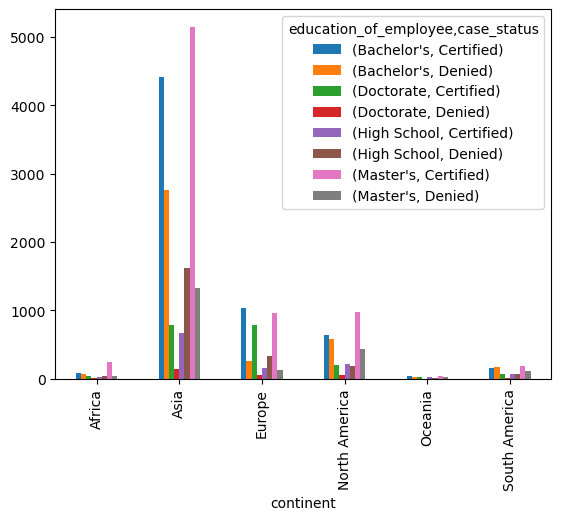

In [67]:
df6.plot(kind='bar')

<Axes: xlabel='education_of_employee'>

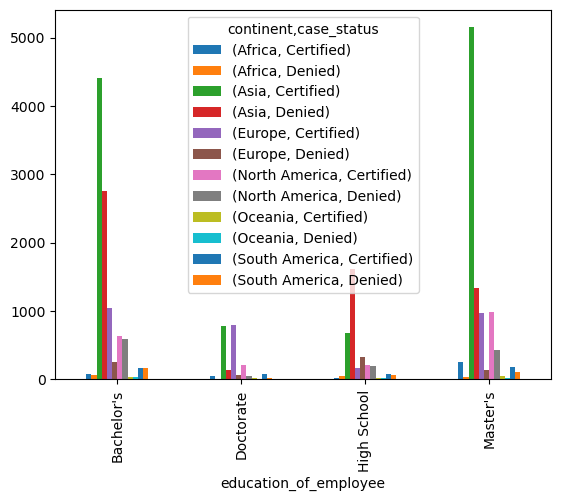

In [68]:
df7.plot(kind='bar')

In [9]:
num_columns


Index(['no_of_employees', 'yr_of_estab', 'prevailing_wage'], dtype='object')

In [10]:
cat_columns

Index(['case_id', 'continent', 'education_of_employee', 'has_job_experience',
       'requires_job_training', 'region_of_employment', 'unit_of_wage',
       'full_time_position', 'case_status'],
      dtype='object')

**numerical vs numerical**

- to understand numerical columns relation we need to plot scatter plots
- scatter plots gives the relation between two numerical columns
- bar chart - pie chart - histogram - scatter plots 
- scatter plot under matplotlib package
- **plt.scatter**

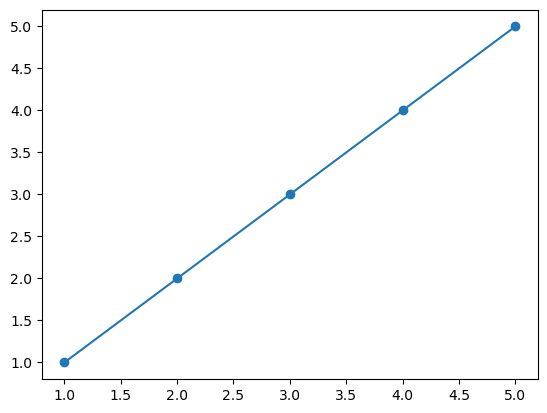

In [19]:
x=[1,2,3,4,5]
y=[1,2,3,4,5]
plt.scatter(x,y)
plt.plot(x,y)
plt.show()

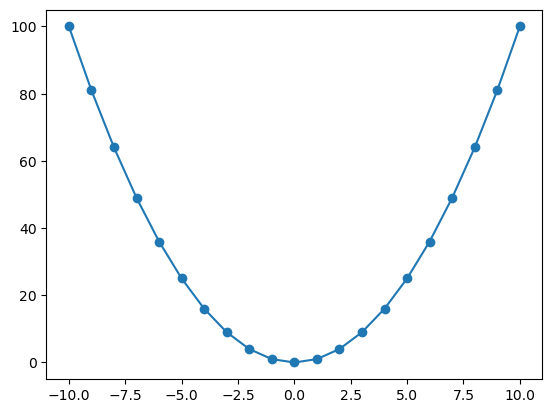

In [23]:
x=[i for i in range(-10,11)]
y=[i*i for i in x]
plt.scatter(x,y)
plt.plot(x,y)
plt.show()

In [24]:
num_columns

Index(['no_of_employees', 'yr_of_estab', 'prevailing_wage'], dtype='object')

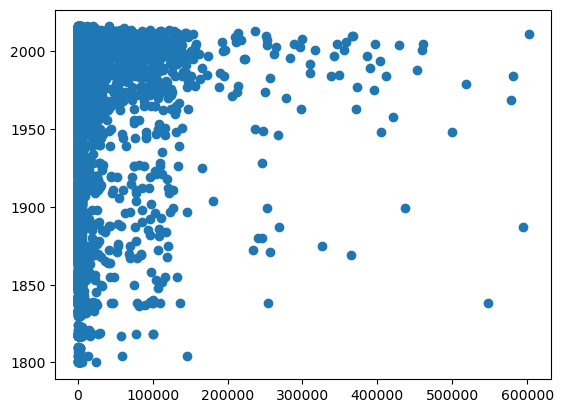

In [36]:
x=visa_df.no_of_employees
y=visa_df.yr_of_estab
plt.scatter(x,y)
plt.show()

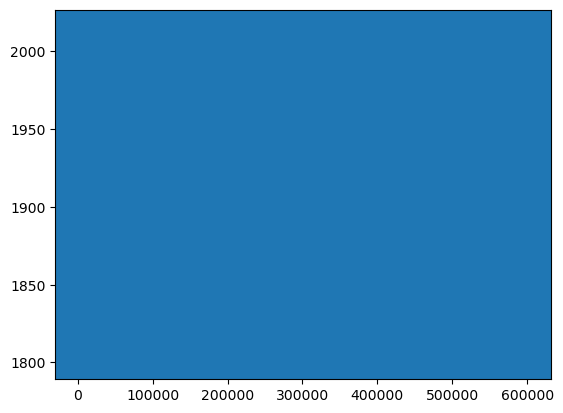

In [37]:
x=visa_df.no_of_employees
y=visa_df.yr_of_estab
z=visa_df.prevailing_wage
plt.scatter(x,y,z)
plt.show()


- implement the covaricane function 
- covariance vs correlation 
    - covariance will tell about the columns have relation or not 
    - covariance will explain about relation status 
         - positive ralation 
         - negative relation
         - no relation
    - correlation tells about how much reltion between two variables 
    - it denotes with 'r'
    - r varies from -1 to 1 
    - -1 to 0 indicates negative relation quantity 
    - 0 to 1 indicates positive relation quatity 
    - 0 indicates no relation 

**method name: corr**

In [41]:
visa_df.corr(numeric_only=True)

,no_of_employees,yr_of_estab,prevailing_wage
no_of_employees,1.000000,-0.017770,-0.009523
yr_of_estab,-0.017770,1.000000,0.012342
prevailing_wage,-0.009523,0.012342,1.000000


**heat map**
- heat map is one of the important visualization method, to show the matrix form 
- it is under **seaborn** package
- in every matrix we have heighest values and lowest values available
- heat map will give colurs visualization
- also it provides color bar , which color indicates which value 


<Axes: >

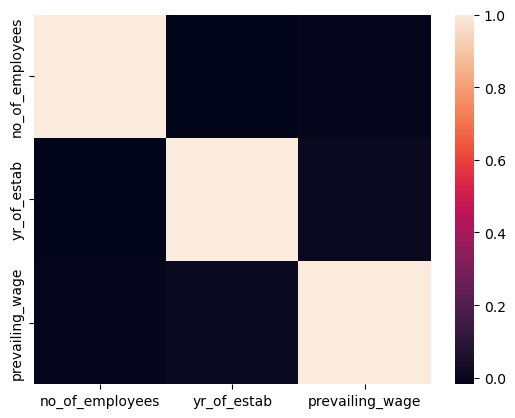

In [42]:
corr_data=visa_df.corr(numeric_only=True)
sns.heatmap(corr_data)

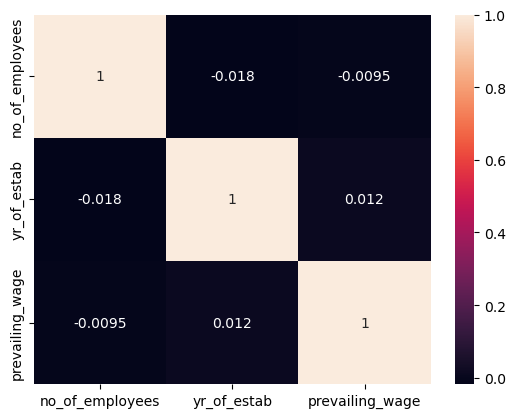

In [45]:
corr_data=visa_df.corr(numeric_only=True)
sns.heatmap(corr_data,annot=True)
plt.show()

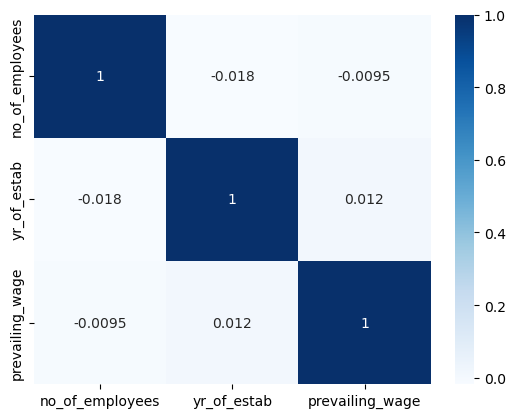

In [52]:
corr_data=visa_df.corr(numeric_only=True)
sns.heatmap(corr_data,annot=True,cmap='Blues')
plt.show()

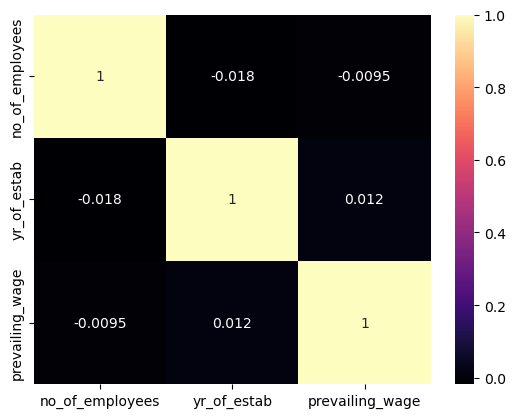

In [53]:
corr_data=visa_df.corr(numeric_only=True)
sns.heatmap(corr_data,annot=True,cmap='magma')
plt.show()

- by seeing the graphs we might not say the relation status 
- it is best practice get the percentage of relation using correlation
- all 3 columns having approximetely zero percentage relation 
- which indicates all the columns having no relation 
- noo relation means independent each other 
- in mechine learing (ml) we expect the input columns should be indipendent each other 
- corr method gives matrix view
- we have 3 columns 3*3 total 9 fields 
- if a data has 20 columns then 20*20 total 400 feilds
- thats why always go with heat map visualazation 
